<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/7078619/pexels-photo-7078619.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Getting Started </span></b> </div>

<br>

The aim of this analysis is to investigate a range of health-related factors and their interconnections **to classify diabetes accurately**. These factors include aspects such as **`age`**, **`gender`**, **`body mass index (BMI)`**, **`hypertension`**, **`heart disease`**, **`smoking history`**, **`HbA1c level`**, and **`blood glucose level`**. This comprehensive examination will not only provide insights into the patterns and trends in diabetes risk but will also create a solid base for further research. Specifically, research can be built on how these variables interact and influence diabetes occurrence and progression, crucial knowledge for improving patient care and outcomes in this increasingly critical area of healthcare.

<br>

![](https://www.aoa.org/AOA/Images/News_2019/Donut-or-orange.jpg)

<br>

### <b><span style='color:#16C2D5'>|</span> Domain Knowledge</b>

<br>


1. **`Age`:** Age is an important factor in predicting diabetes risk. As individuals get older, their risk of developing diabetes increases. This is partly due to factors such as reduced physical activity, changes in hormone levels, and a higher likelihood of developing other health conditions that can contribute to diabetes.

2. **`Gender`**: Gender can play a role in diabetes risk, although the effect may vary. For example, women with a history of gestational diabetes (diabetes during pregnancy) have a higher risk of developing type 2 diabetes later in life. Additionally, some studies have suggested that men may have a slightly higher risk of diabetes compared to women.

3. **`Body Mass Index (BMI)`:** BMI is a measure of body fat based on a person's height and weight. It is commonly used as an indicator of overall weight status and can be helpful in predicting diabetes risk. Higher BMI is associated with a greater likelihood of developing type 2 diabetes. Excess body fat, particularly around the waist, can lead to insulin resistance and impair the body's ability to regulate blood sugar levels.

4. **`Hypertension`:** Hypertension, or high blood pressure, is a condition that often coexists with diabetes. The two conditions share common risk factors and can contribute to each other's development. Having hypertension increases the risk of developing type 2 diabetes and vice versa. Both conditions can have detrimental effects on cardiovascular health.

5. **`Heart Disease`:** Heart disease, including conditions such as coronary artery disease and heart failure, is associated with an increased risk of diabetes. The relationship between heart disease and diabetes is bidirectional, meaning that having one condition increases the risk of developing the other. This is because they share many common risk factors, such as obesity, high blood pressure, and high cholesterol.

6. **`Smoking History`:** Smoking is a modifiable risk factor for diabetes. Cigarette smoking has been found to increase the risk of developing type 2 diabetes. Smoking can contribute to insulin resistance and impair glucose metabolism. Quitting smoking can significantly reduce the risk of developing diabetes and its complications.

7. **`HbA1c Level`:** HbA1c (glycated hemoglobin) is a measure of the average blood glucose level over the past 2-3 months. It provides information about long-term blood sugar control. Higher HbA1c levels indicate poorer glycemic control and are associated with an increased risk of developing diabetes and its complications.

8. **`Blood Glucose Level`:** Blood glucose level refers to the amount of glucose (sugar) present in the blood at a given time. Elevated blood glucose levels, particularly in the fasting state or after consuming carbohydrates, can indicate impaired glucose regulation and increase the risk of developing diabetes. Regular monitoring of blood glucose levels is important in the diagnosis and management of diabetes.

<br>

✔️ **These features, when combined and analyzed with appropriate statistical and machine learning techniques, can help in predicting an individual's risk of developing diabetes.**

# <span style="color:#E888BB; font-size: 1%;">INTRODUCTION</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3850689/pexels-photo-3850689.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>INTRODUCTION </span></b> </div>

<br>

### <b>I <span style='color:#16C2D5'>|</span> Preface</b> 

In this analysis, we have chosen the RandomForest classifier as our model. **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">The RandomForest algorithm</mark>** is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes for classification or mean prediction of the individual trees for regression.

Several reasons guided our choice of **<span style='color:#16C2D5'>Random Forest</span>** for this task:

1. **Handling of Large Data:** **<span style='color:#16C2D5'>Random Forest</span>** is capable of efficiently handling large datasets with high dimensionality. Our dataset, containing a substantial number of rows and several features, falls into this category.

2. **Robustness to Overfitting:** **<span style='color:#16C2D5'>Random Forest</span>** reduces the risk of overfitting, which is a common problem with decision trees. The algorithm accomplishes this by creating a set of **<mark style="background-color:#DDE6ED;color:black;border-radius:4px;opacity:1.0">decision trees</mark>** (a "forest") and making the final prediction based on the majority vote of the individual trees.

3. **Handling Mixed Data Types:** In our dataset, we have both numerical and categorical features. **<span style='color:#16C2D5'>Random Forest</span>** handles such mixtures smoothly, which makes it an ideal choice.

4. **Feature Importance:** **<span style='color:#16C2D5'>Random Forest</span>** provides a straightforward way to estimate feature importance. Given our aim to investigate the impact of different factors on diabetes, this characteristic is particularly useful.

5. **Non-linearity:** Medical data often contains complex and non-linear relationships. **<span style='color:#16C2D5'>Random Forest</span>**, being a non-linear model, can capture these relationships effectively.

<br>

> ⚠️ It's worth noting that while **<span style='color:#16C2D5'>Random Forest</span>** is a strong candidate given its mentioned advantages, the choice of model should always be considered with a grain of salt. Other models might perform better on the task, and it's generally a good practice to try several models and compare their performance. However, for the purpose of this analysis and given our dataset, **<span style='color:#16C2D5'>Random Forest</span>** **is a practical and reasonable starting point**.

<br>

### <b>II <span style='color:#16C2D5'>|</span> Import libraries</b> 

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np 
import pandas as pd 

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

### <b>III <span style='color:#16C2D5'>|</span> Input the data</b> 

In [2]:
df = pd.read_csv("../diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


# <span style="color:#E888BB; font-size: 1%;">1 | EXPLORATORY DATA ANALYSIS</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3850689/pexels-photo-3850689.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>1 | EXPLORATORY DATA ANALYSIS </span></b> </div>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 1. Data Quality</span></b> </div>

### <b>I <span style='color:#16C2D5'>|</span> Handling Duplicates</b> 

In [4]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [5]:
df = df.drop_duplicates()

### <b>II <span style='color:#16C2D5'>|</span> Uniqueness</b> 

In [6]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


### <b>III <span style='color:#16C2D5'>|</span> Missing Values</b> 

In [7]:
# Checking null values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [8]:
# Remove Unneccessary value [0.00195%]
df = df[df['gender'] != 'Other']

### <b>IV <span style='color:#16C2D5'>|</span> Describe the Data</b> 

In [9]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 2. Univariate Analysis</span></b> </div>

### <b>I <span style='color:#16C2D5'>|</span> Histogram for age</b> 

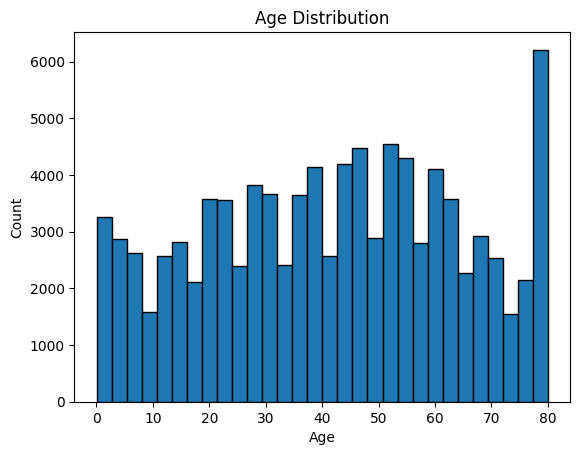

In [10]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### <b>II <span style='color:#16C2D5'>|</span> Bar plot for gender</b> 

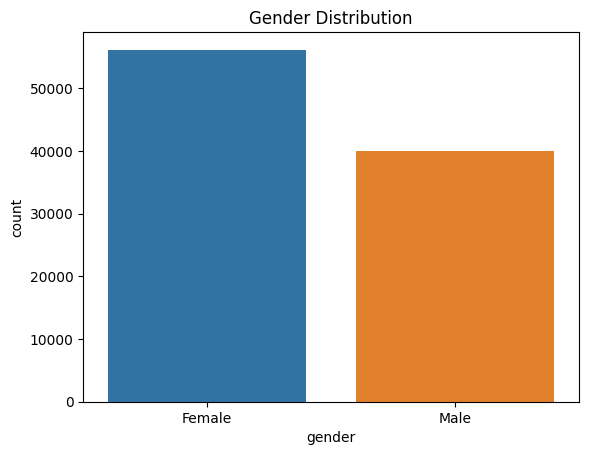

In [11]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

### <b>III <span style='color:#16C2D5'> | </span> Distribution plot for BMI</b> 

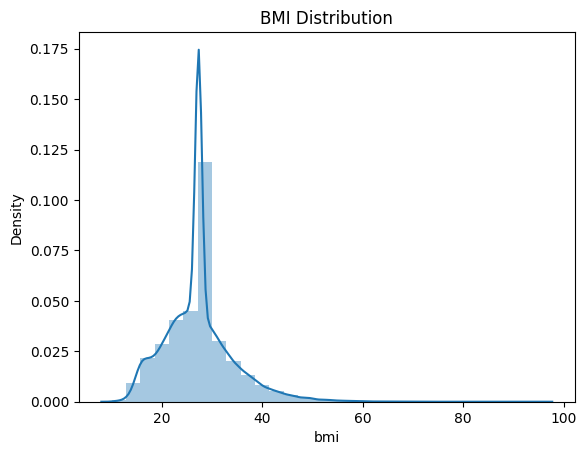

In [12]:
# Distribution plot for BMI
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

### <b>IV <span style='color:#16C2D5'>|</span> Count plots for binary variables</b> 

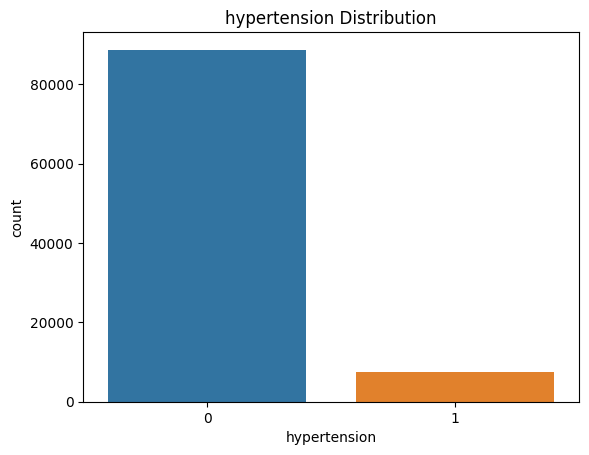

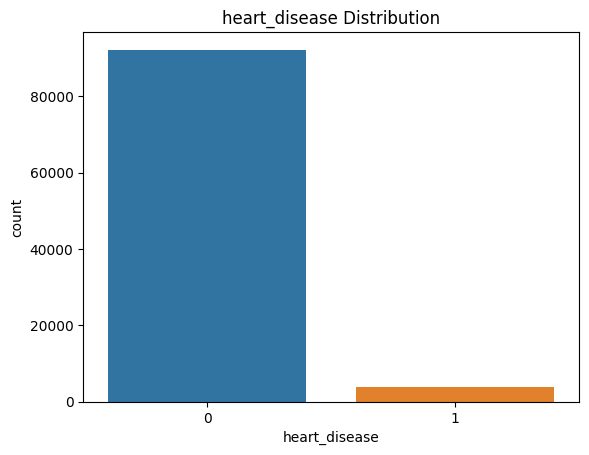

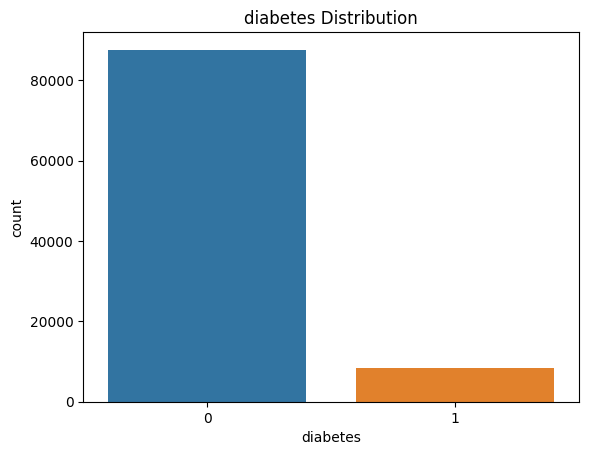

In [13]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

### <b>V <span style='color:#16C2D5'>|</span> Count plot for smoking history</b> 

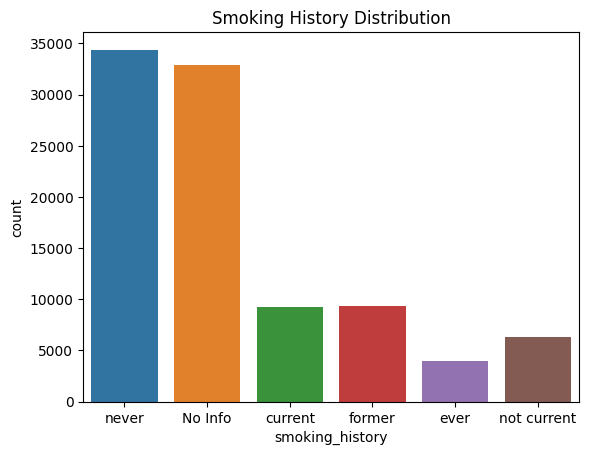

In [14]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 3.Bivariative Analysis</span></b> </div>
### <b>I <span style='color:#16C2D5'>|</span> Boxplot BMI vs Diabetes classification</b> 

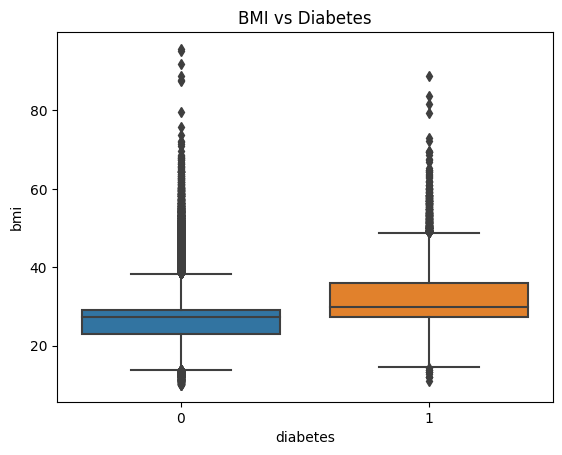

In [15]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

### <b>II <span style='color:#16C2D5'>|</span> Boxplot Age vs Diabetes classification</b> 

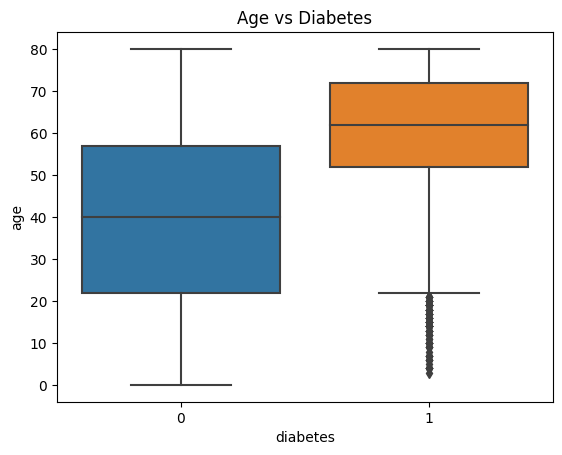

In [16]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

### <b>III <span style='color:#16C2D5'>|</span> Count plot of gender vs diabetes</b> 

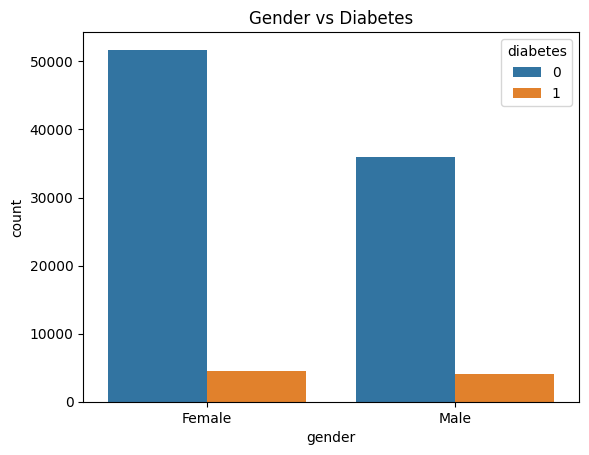

In [17]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

### <b>III <span style='color:#16C2D5'>|</span> Boxplot HbA1c level vs Diabetes classification</b> 

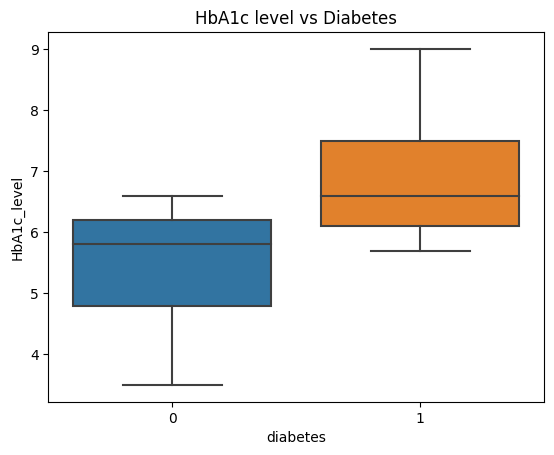

In [18]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

### <b>IV <span style='color:#16C2D5'>|</span> Boxplot blood glucose level vs Diabetes classification</b> 

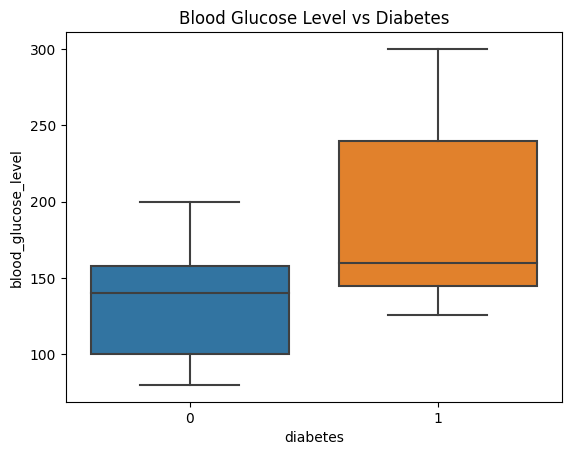

In [19]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

### <b>V <span style='color:#16C2D5'>|</span> Pair plot for numeric features</b> 

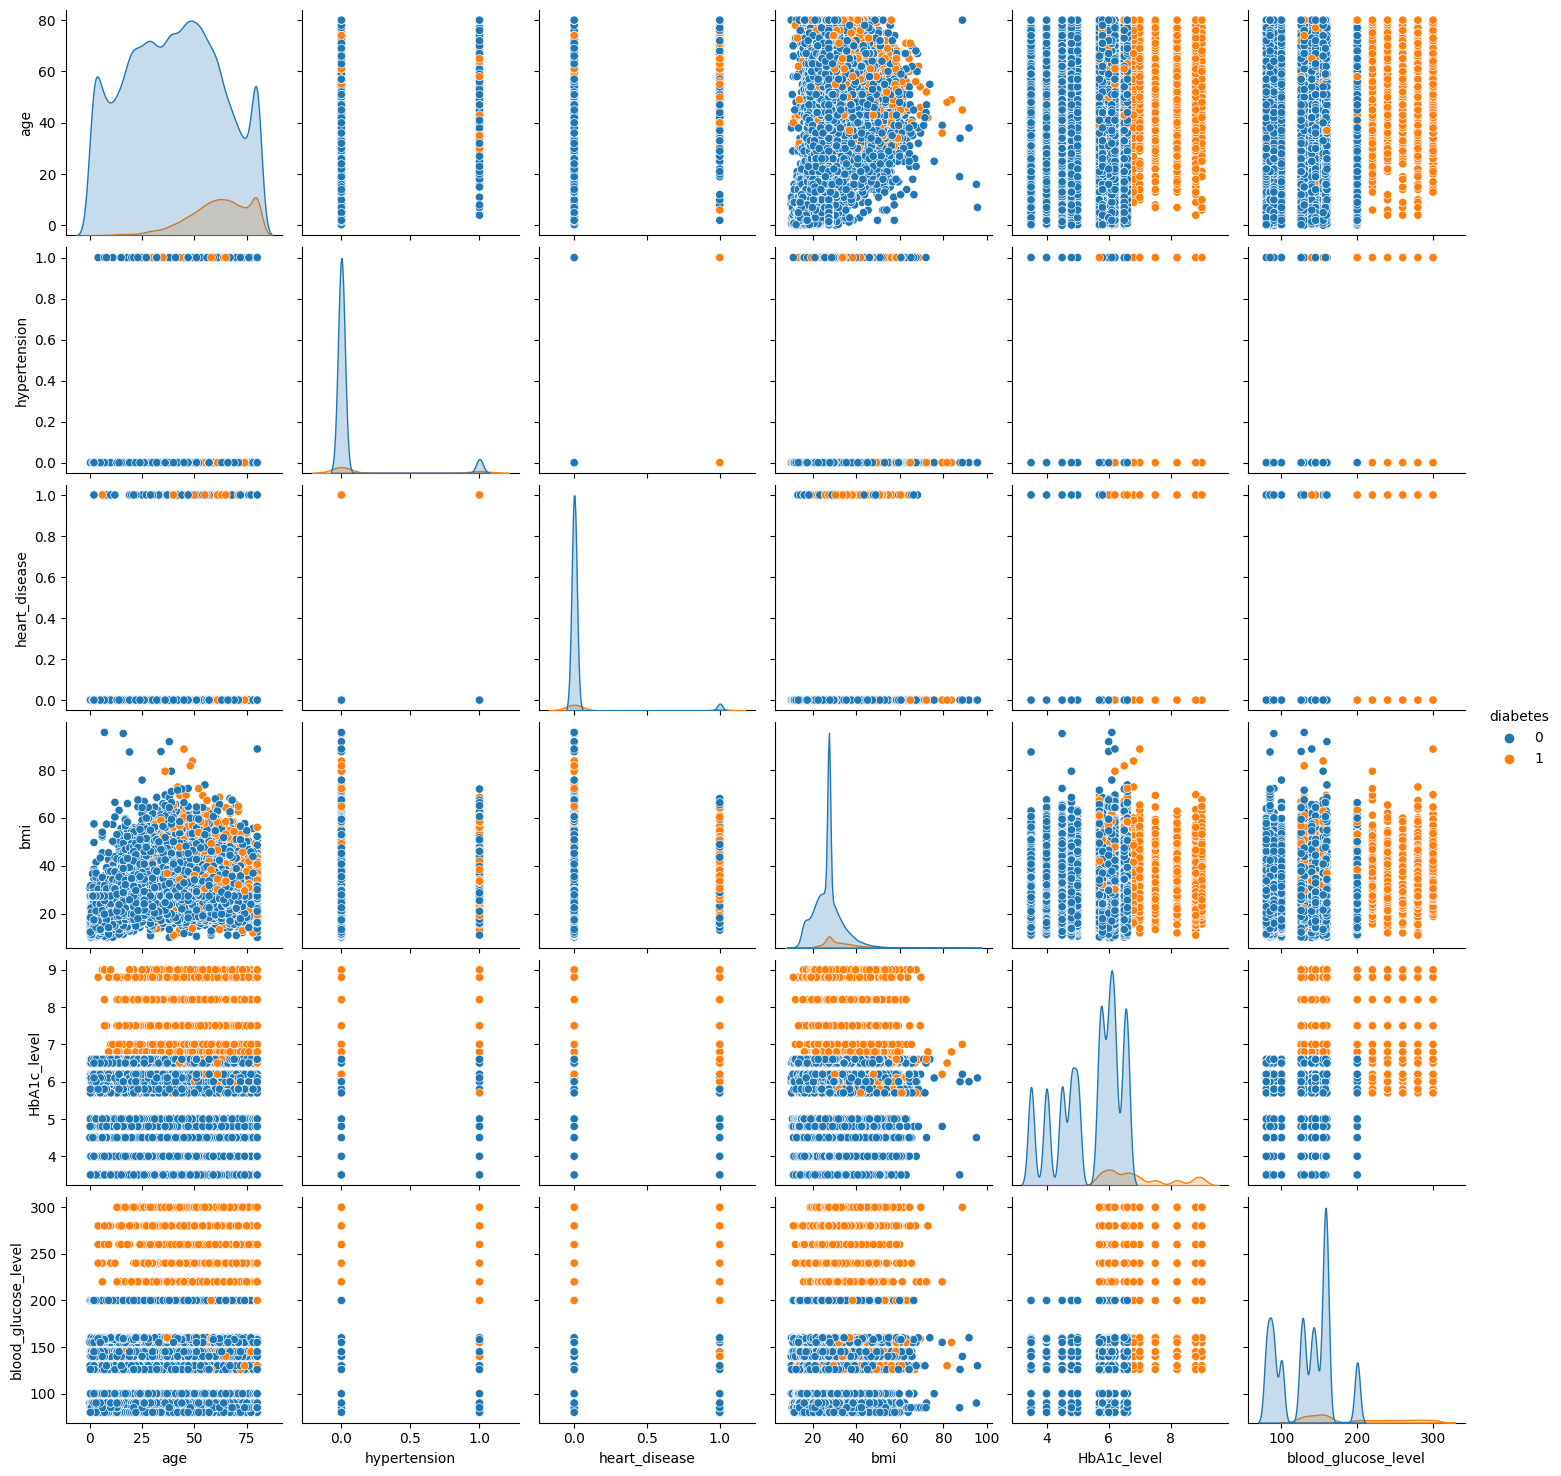

In [20]:
# Pair plot for numeric features
sns.pairplot(df, hue='diabetes')
plt.show()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 4. Multivariate analysis</span></b> </div>

### <b>I <span style='color:#16C2D5'>|</span> Scatterplot Age vs BMI colored by Diabetes classification</b> 

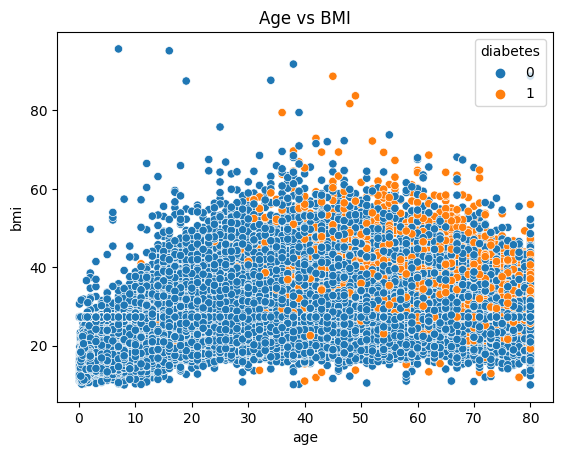

In [21]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

### <b>II <span style='color:#16C2D5'>|</span> Violin plot of BMI against diabetes classification split by gender</b> 

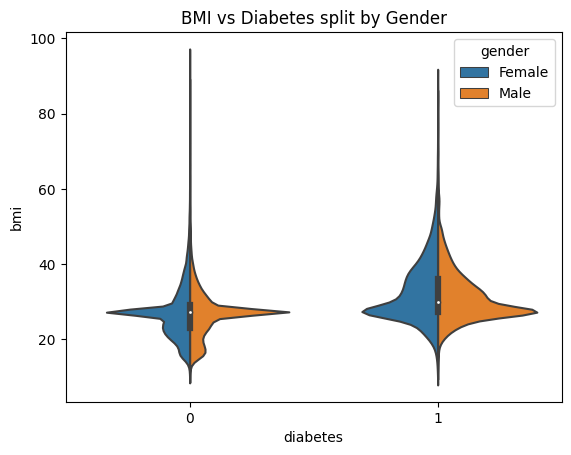

In [22]:
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

### <b>III <span style='color:#16C2D5'>|</span> Interaction between gender, BMI and diabetes</b> 

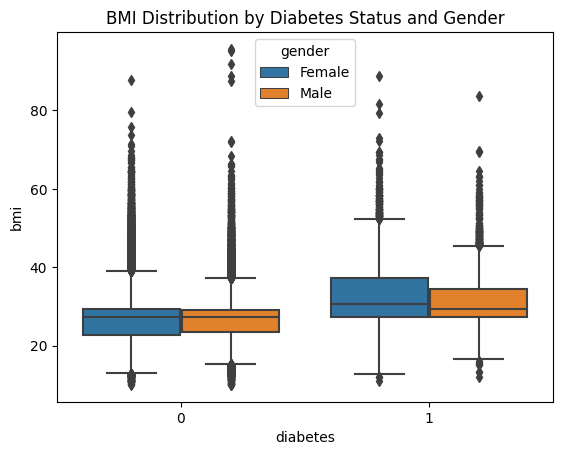

In [23]:
# Interaction between gender, BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

### <b>IV <span style='color:#16C2D5'>|</span> Interaction between gender, Age and diabetes</b> 

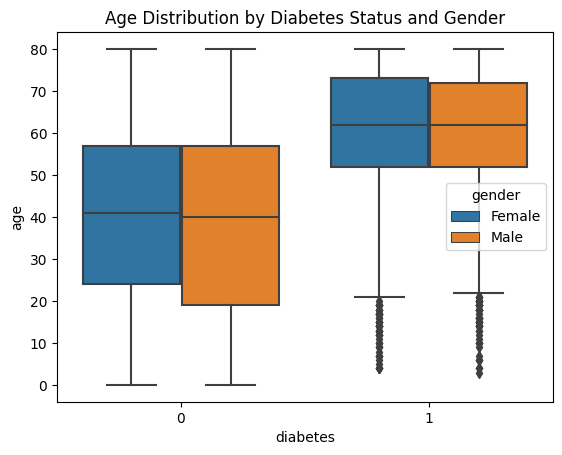

In [24]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

# <span style="color:#E888BB; font-size: 1%;">2 | CORRELATION</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://images.pexels.com/photos/3850689/pexels-photo-3850689.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>2 | CORRELATION </span></b> </div>

### <b>I <span style='color:#16C2D5'>|</span> Data preparation</b> 

In [25]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

non-smoker     67276
past_smoker    19655
current         9197
Name: smoking_history, dtype: int64


In [26]:
data = df.copy()

### <b>II <span style='color:#16C2D5'>|</span> Encoding</b> 

In [27]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

### <b>III <span style='color:#16C2D5'>|</span> Correlation Matrix</b> 

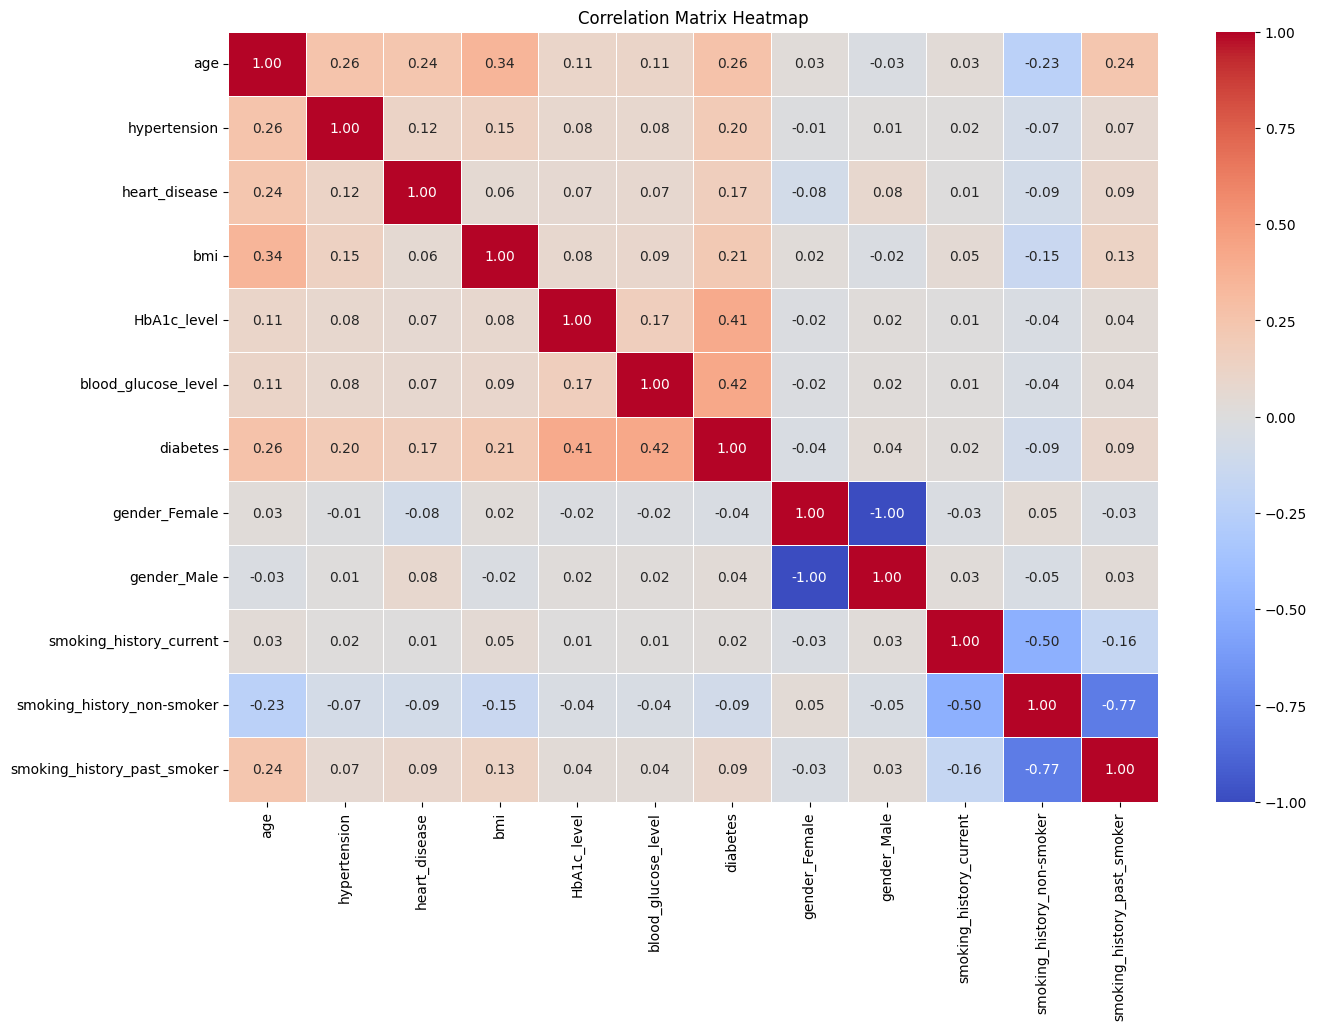

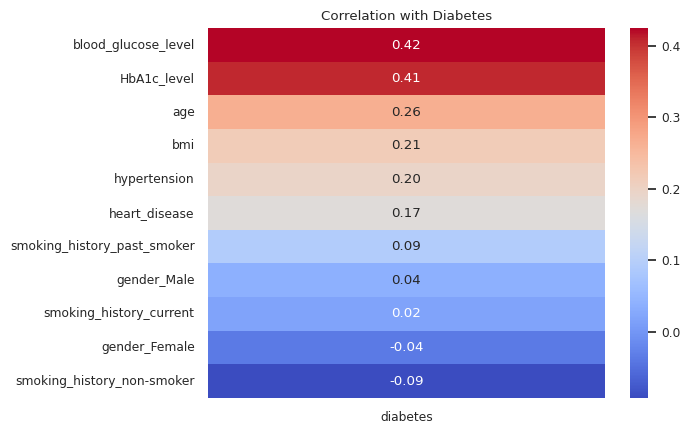

In [28]:
# Compute the correlation matrix
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

# <span style="color:#E888BB; font-size: 1%;">3 |  PREDICTIVE ANALYSIS</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://images.pexels.com/photos/3850689/pexels-photo-3850689.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>3 |  PREDICTIVE ANALYSIS </span></b> </div>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 1. Class Imbalance</span></b> </div>

From the EDA ,the dataset is imbalanced (with 9% positive cases for diabetes and 91% negative cases), it's essential to balance the data to ensure that the model doesn't get biased towards the majority class. For this purpose, the Synthetic Minority Over-sampling Technique (SMOTE) is used, which generates synthetic samples for the minority class.

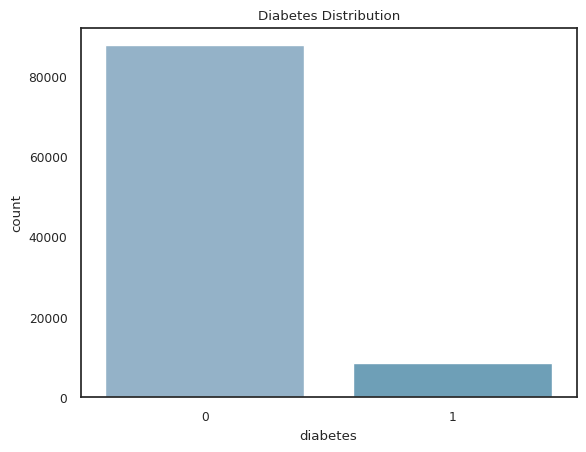

In [29]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

In [30]:
# Define resampling
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 2.Preprocessing : Scaler</span></b> </div>

Preprocessing is a crucial step before training the model. In this case, numerical features are standardized (mean removed and scaled to unit variance), and categorical features are one-hot encoded. **<span style='color:#16C2D5'>Standardization</span>** is not required for all models but is generally a good practice. **<span style='color:#16C2D5'>One-hot encoding</span>** is necessary for categorical variables to be correctly understood by the machine learning model.

The **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">StandardScaler</mark>** in sklearn is based on the assumption that the data, Y, follows a distribution that might not necessarily be Gaussian (normal), but we still transform it in a way that its distribution will have a mean value 0 and standard deviation of 1.</p>

<p>In other words, given a feature vector <em>x</em>, it modifies the values as follows:</p>

<p class="formulaDsp">
\[ Y_i = \frac{x_i - \mu(\vec{x})}{\sigma(\vec{x})} \]
</p>

**where:**
<ul>
<li>\( x_i \) is the i-th element of the original feature vector \( \vec{x} \),</li>
<li>\( \mu(\vec{x}) \) is the mean of the feature vector, and</li>
<li>\( \sigma(\vec{x}) \) is the standard deviation of the feature vector.</li>
</ul>

<p>The transformed data \( Y \) (each \( Y_i \)) will have properties such that \( mean(Y) = 0 \) and \( std(Y) = 1 \).</p>

> This transformation is also known as Z-score normalization.


In [31]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

# Split data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [32]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
clf = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', RandomForestClassifier())])

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 3. Model Building and Hyperparameter Tuning</span></b> </div>

A pipeline is constructed which first applies the preprocessing steps and then trains a model on the data. We use a **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">RandomForestClassifier</mark>**, which is a popular and powerful algorithm for classification tasks. The model's hyperparameters are tuned using **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">GridSearchCV</mark>** , which performs an exhaustive search over the specified parameter values for the estimator. The best performing model is selected based on cross-validation.

In [33]:
# Define the hyperparameters and the values we want to test
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [34]:
# Create Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


### <b><span style='color:#16C2D5'>|</span> Intepret the results </b>

The result shows the best parameters for our **<span style='color:#16C2D5'>Random Forest model</span>** that were found during the hyperparameter tuning process:

1. **max_depth of 10:** This indicates that the maximum depth of the trees in the forest is 10 levels. Constraining the depth of the tree helps in reducing overfitting. It appears from this result that a medium-complexity tree works best for our data. Too much complexity (a deeper tree) may capture noise, and too little (a shallower tree) may not capture the underlying structure of the data.

2. **min_samples_leaf of 2:** This means that each leaf (the end node of a decision tree, where predictions are made) must contain at least two samples. This parameter, like max_depth, is a way to control overfitting. By requiring at least two samples to make a prediction, the model prevents fitting to outliers or noise in the training data.

3. **min_samples_split of 2:** This tells us that a node must contain at least two samples in order to be split (to create two child nodes). Similar to the min_samples_leaf parameter, this can help control overfitting.

4. **n_estimators of 50:** This is the number of decision trees in the forest. The Random Forest algorithm works by averaging the predictions of many decision trees to make a final prediction, which helps reduce overfitting and variance. In this case, it seems that having 50 trees in the forest gives us the best performance.

<br>

<div style="border-radius:10px;border:#16C2D5 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
     💬 These parameters are a result of the Hyperparameter tuning process , and they give us insight into the structure of the data and the complexity of the model that best captures that structure. The moderately constrained tree depth and the requirements for the number of samples at each node suggest a model that is complex enough to capture the important patterns in the data, but not so complex that it overfits to noise or outliers.This balance is crucial in creating a model that will generalize well to new data.

</div>
 
    
    

![](https://digitalpress.fra1.cdn.digitaloceanspaces.com/mhujhsj/2022/09/Internal-Nodes-crop-1.png)

<br>

> Remember, these are the optimal parameters given the parameter grid we defined and the specific dataset at hand. For a **different dataset** or with a **different parameter grid**, **the optimal parameters could be different.**

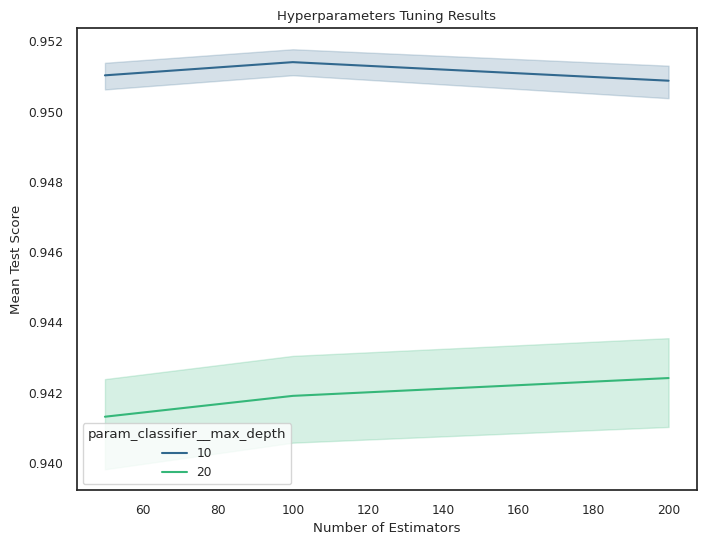

In [35]:
# Convert GridSearchCV results to a DataFrame and plot
results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='viridis')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 4. Confusion Matrix</span></b> </div>

The trained model is evaluated on the **test set**. **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">Confusion matrix</mark>** is used to visualize the performance of the model. It shows the true positive, true negative, false positive, and false negative predictions of the model.

<br>

![](https://miro.medium.com/v2/resize:fit:1218/1*jMs1RmSwnYgR9CsBw-z1dw.png)

#### **<span style='color:#16C2D5'>Precision:</span>**

Precision is a measure of how many of the true positive predictions were actually correct. It is defined as the number of true positives (TP) divided by the sum of true positives (TP) and false positives (FP).

<p class="formulaDsp">
\[ Precision = \frac{TP}{TP + FP} \]
</p>

#### **<span style='color:#16C2D5'>Recall:</span>**


Recall (or Sensitivity) is a measure of how many of the actual positive cases were identified correctly. It is defined as the number of true positives (TP) divided by the sum of true positives (TP) and false negatives (FN).

<br>

<p class="formulaDsp">
\[ Recall = \frac{TP}{TP + FN} \]
</p>

#### **<span style='color:#16C2D5'>F1-Score:</span>**


The F1 score is the harmonic mean of Precision and Recall and tries to find the balance between precision and recall. It is defined as 2 times the product of precision and recall divided by the sum of precision and recall.

<br>

<p class="formulaDsp">
\[ F1 Score = \frac{2 * Precision * Recall}{Precision + Recall} \]
</p>

<br>
    
<div style="border-radius:10px;border:#16C2D5 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">     
    <b><span style='color:#16C2D5'>|</span> In all of these formulas: </b>
    
True Positives (TP) are the cases in which we predicted yes (diabetes present), and the actual was also yes.
True Negatives (TN) are the cases in which we predicted no, and the actual was also no.
False Positives (FP) are the cases in which we predicted yes, but the actual was no.
False Negatives (FN) are the cases in which we predicted no, but the actual was yes.   
</div>  


Model Accuracy:  0.9490273587849787
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17525
           1       0.68      0.80      0.74      1701

    accuracy                           0.95     19226
   macro avg       0.83      0.88      0.85     19226
weighted avg       0.95      0.95      0.95     19226



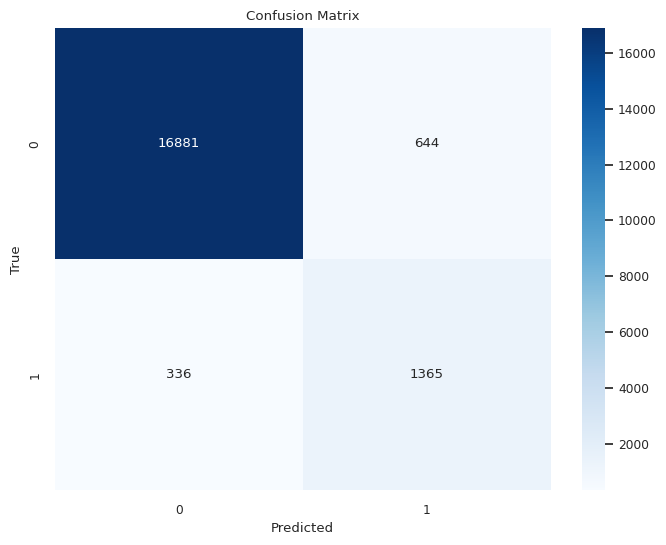

In [36]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### <b><span style='color:#16C2D5'>|</span> Intepret the results </b>

Our trained **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">Random Forest Model</mark>** achieved an accuracy of around 95%. This indicates that the model correctly classified around 95% of all cases in the test set.

Looking deeper into the classification metrics, let's dissect the performance for each class (0 and 1) separately:

#### <b><span style='color:#16C2D5'> A |</span> Class 0 (Non-diabetes): </b>
- The model has a high precision (0.98) for class 0, meaning that among all instances where the model predicted non-diabetes, 98% were indeed non-diabetes. 
- The recall for class 0 is also high (0.96). This means that our model correctly identified 96% of all actual non-diabetes cases in the dataset. 

#### <b><span style='color:#16C2D5'> B |</span> Class 1 (Diabetes): </b>
- The precision for class 1 is lower around (0.65), which indicates that when the model predicted diabetes, it was correct around 65% of the time. 
- However, the recall is reasonably high around (0.80). This means that our model was able to capture around 80% of all actual diabetes cases. 

The F1 score, a harmonic mean of precision and recall, is around 0.97 for class 0 and around 0.72 for class 1. The weighted average F1 score is around 0.94, in line with the overall accuracy.

This discrepancy in performance between classes is likely due to the imbalance in the original dataset. Class 0 (Non-diabetes) is the majority class and has more examples for the model to learn from.

> However, the higher recall for class 1 (Diabetes) is promising. This is an essential aspect for a healthcare model, as missing actual positive cases (false negatives) can have serious implications. 

<BR>
    
<div style="border-radius: 10px; border: #16C2D5 solid; padding: 15px; background-color: #ffffff00; font-size: 110%; text-align: left;">
    📝 In summary, while our model performs well overall, it particularly excels with the majority class (non-diabetes). To enhance performance on the minority class (diabetes), we can further address class imbalance or adjust model parameters. Despite these areas for improvement, the model's ability to accurately identify a high percentage of actual diabetes cases is encouraging at this early stage of model development. Subsequent iterations and refinements are expected to enhance precision in diabetes predictions without compromising recall.
</div>    
    

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 5. Feature Importance</span></b> </div>

Finally, the importance of each feature is computed. This is the total decrease in node impurity (weighted by the probability of reaching that node, which is approximated by the proportion of samples reaching that node) averaged over all trees of the ensemble. **The feature importance gives insight into which features are most useful for making predictions.** The features are ranked by their importance and visualized using a bar plot.

                        Feature  Importance
2                   HbA1c_level        0.44
3           blood_glucose_level        0.31
0                           age        0.13
1                           BMI        0.06
4                  hypertension        0.03
5                 heart_disease        0.02
10  smoking_history_past_smoker        0.00
9    smoking_history_non-smoker        0.00
7                   gender_Male        0.00
6                 gender_Female        0.00
8       smoking_history_current        0.00


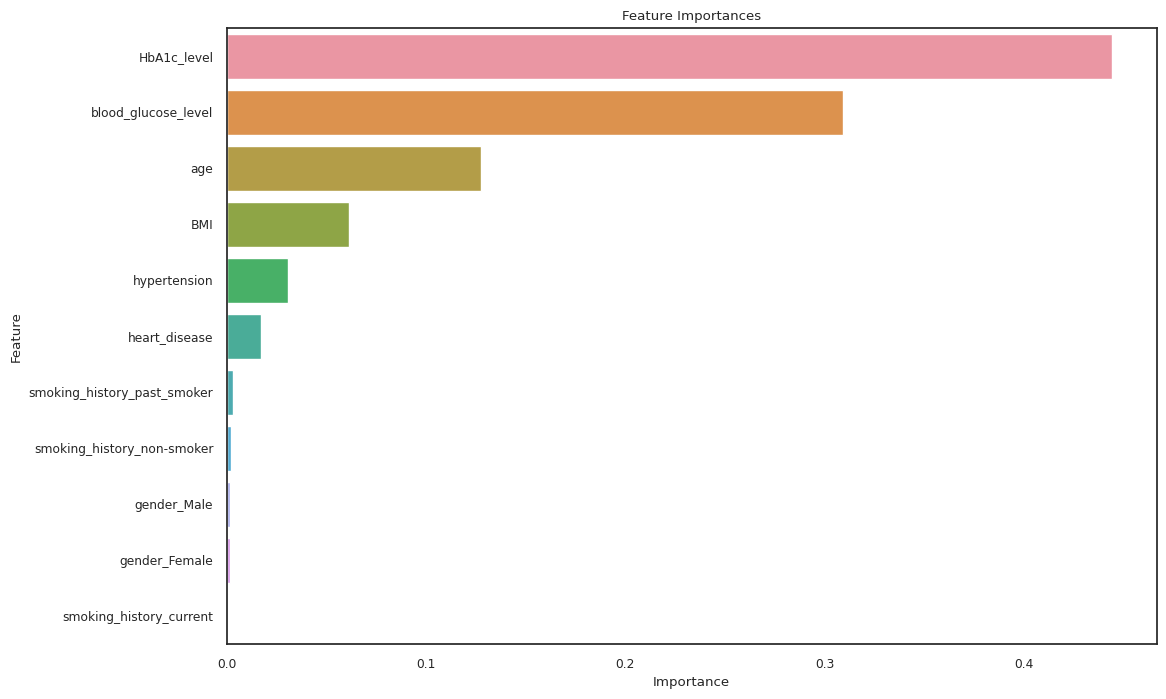

In [37]:
# After fitting the model, we input feature names
onehot_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

### <b><span style='color:#16C2D5'>|</span> Intepret the results </b>

The feature importance results provide insight into which features are most influential in predicting diabetes using our **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">Random Forest Model</mark>**. The importance of a feature is calculated based on how much the tree nodes that use that feature reduce impurity across all trees in the forest.

#### **<span style='color:#16C2D5'>Here are the key findings from the feature importance results:</span>**

1. **`HbA1c_level`** is the most important feature with an importance of 0.44. HbA1c is a measure of the average levels of blood glucose over the past 2 to 3 months, so it's not surprising that it's a significant predictor of diabetes.

2. **`The blood_glucose_level`** the second most important feature with an importance of 0.32. This aligns with medical knowledge, as blood glucose levels are directly used to diagnose diabetes.

3. **`Age`** the third most important feature with an importance of 0.14. It's well known that the risk of type 2 diabetes increases as you get older.

4. **`BMI`** comes fourth in terms of importance at 0.06. Body Mass Index is a key risk factor for diabetes, and its role is well documented in medical literature.

5. Other features like **`hypertension`** and **`heart_disease`** show some importance (0.02 and 0.01, respectively), indicating that these health conditions might have some relevance in predicting diabetes, though not as significant as the top four factors.

6. **`Smoking history`** ('smoking_history_non-smoker', 'smoking_history_past_smoker', 'smoking_history_current') and **`gender`** ('gender_Female', 'gender_Male') are shown to have minimal or zero importance in our model. This could be due to a number of reasons including that these factors may not be as influential in the development of diabetes or it could be a result of how the data was collected or structured.

<br>

<div style="border-radius:10px;border:#16C2D5 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left"> 
    ⚠️ These results, however, should be interpreted with caution. The importance of a feature in a Random Forest model doesn't necessarily mean a casual relationship, and it is specific to this model and this dataset. Other models might find different results. Additionally, low importance doesn't mean that the feature is unimportant for predicting diabetes in general, it may just mean that the feature is not useful in the presence of the other features. A thorough feature analysis should be considered for a better understanding of the contribution of each feature in the prediction.

</div> 

<br>

> Overall, our findings do align well with medical knowledge and literature about risk factors for diabetes. The most important features are `blood-related` measurements, followed by `age` and `BMI`, with less importance seen for comorbid conditions like `hypertension` and `heart disease`.

# <span style="color:#E888BB; font-size: 1%;">SUMMARY</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://images.pexels.com/photos/3850689/pexels-photo-3850689.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>SUMMARY </span></b> </div>

<br>

The analysis employed a **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">Random Forest classifier</mark>** to predict diabetes based on various health indicators and lifestyle factors. The model was trained and evaluated on a dataset of 100,000 records, and **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">Hyperparameter tuning</mark>** was performed to optimize the model's performance.

The model achieved an **accuracy of approximately 95.1%**, with precision of 0.98 for class 0 (non-diabetic) and 0.69 for class 1 (diabetic). It was also able to recall 96% of non-diabetic cases and 81% of diabetic cases correctly. The relatively high accuracy and balanced performance on both classes indicate that the model is well-tuned and robust.

Feature importance analysis highlighted **`HbA1c_level`** and **`blood_glucose_level`** as the most critical factors in predicting **<span style='color:	#16C2D5'>Diabetes</span>**. **`Age`** and **`BMI`** also showed significant importance. However, some features, such as **`smoking history`** and **`gender`**, had minimal or no impact on the model's predictions.

# <span style="color:#E888BB; font-size: 1%;">SUGGESTION</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://images.pexels.com/photos/3850689/pexels-photo-3850689.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>SUGGESTION</span></b> </div>

<br>

1. **<span style='color:#16C2D5'>Data Collection:</span>** If further data collection is possible, we could aim to gather more information about lifestyle factors and other potential diabetes risk factors not covered in this dataset. For instance, detailed diet information, physical activity level, family history of diabetes, and more precise information on heart disease or hypertension might improve the model's predictive capabilities.

2. **<span style='color:#16C2D5'>Model Exploration:</span>** While the **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">Random Forest model</mark>** has performed well, it might be worth exploring other machine learning models. For instance, gradient boosting models like **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">XGBoost</mark>** or **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">LightGBM</mark>** could potentially offer improved performance.

3. **<span style='color:#16C2D5'>Feature Engineering:</span>** More sophisticated feature engineering could potentially improve model performance. Interaction features, polynomial features, or other transformations might be worth exploring.

4. **<span style='color:#16C2D5'>Model Interpretation:</span>**  To better understand the influence of each feature, we could use interpretability tools such as **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">SHAP</mark>** (SHapley Additive exPlanations) or **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">permutation feature importance</mark>**, which can offer a more nuanced view of feature importance than traditional feature importance based on impurity reduction.

5. **<span style='color:#16C2D5'>Addressing Class Imbalance:</span>** Despite using **<mark style="background-color:#16C2D5;color:white;border-radius:5px;opacity:1.0">SMOTE</mark>** to balance the classes, there is still room for improvement in the performance metrics for the minority class. **Other oversampling methods, undersampling methods, or cost-sensitive learning methods could be explored to improve the recall and precision for the minority class.**

<br>
    
***

<br>

<div style="text-align: center;">
   <span style="font-size: 4.5em; font-weight: bold; font-family: Arial;">THANK YOU!</span>
</div>

<div style="text-align: center;">
    <span style="font-size: 5em;">✔️</span>
</div>

<br>

<div style="text-align: center;">
   <span style="font-size: 1.4em; font-weight: bold; font-family: Arial; max-width:1200px; display: inline-block;">
       If you discovered this notebook to be useful or enjoyable, I'd greatly appreciate any upvotes! Your support motivates me to regularly update and improve it. :-)
   </span>
</div>

<br>

<br>

<div style="text-align: center;">
   <span style="font-size: 1.6em; font-weight: bold;font-family: Arial;"><a href="https://www.kaggle.com/tumpanjawat/code">@pannmie</a></span>
</div>
